In [2]:
import pandas as pd 
departments=pd.read_csv(r"C:\Users\Hp laptop\OneDrive\Documents\DS230_Final_Project\New folder\data\raw\departments.csv")
orders=pd.read_csv(r"C:\Users\Hp laptop\OneDrive\Documents\DS230_Final_Project\New folder\data\raw\orders.csv")
order_products=pd.read_csv(r"C:\Users\Hp laptop\OneDrive\Documents\DS230_Final_Project\New folder\data\raw\order_products__prior.csv")
product=pd.read_csv(r"C:\Users\Hp laptop\OneDrive\Documents\DS230_Final_Project\New folder\data\raw\products.csv")
aisle=pd.read_csv(r"C:\Users\Hp laptop\OneDrive\Documents\DS230_Final_Project\New folder\data\raw\aisles.csv")


In [8]:
print("DATA LOADED SUCCESSFULLY")

DATA LOADED SUCCESSFULLY


In [3]:
order_products = pd.read_csv(
    r"C:\Users\Hp laptop\OneDrive\Documents\DS230_Final_Project\New folder\data\raw\order_products__prior.csv",
    dtype={
        "order_id": "int32",
        "product_id": "int32",
        "add_to_cart_order": "int16",
        "reordered": "int8"
    }
)
product["product_name"] = product["product_name"].astype("category")
aisle["aisle"] = aisle["aisle"].astype("category")
departments["department"] = departments["department"].astype("category")
##I made join for the  data 
df=order_products.merge(orders,on='order_id',how='left')
df=df.merge(product,on='product_id',how='left')
df=df.merge(aisle,on='aisle_id',how='left')
df=df.merge(departments,on='department_id',how='left')
## JOINING COMPLETED SUCCESSFULLY
#print("the final dataFrame shape is :", df.shape)

MemoryError: Unable to allocate 990. MiB for an array with shape (4, 32434489) and data type int64

In [10]:
##check the data:
print("print the first five of rows :\n ",df.head())
print("df.info():\n ",df.info())
print("columns of the dataframe :\n ",df.columns)


NameError: name 'df' is not defined

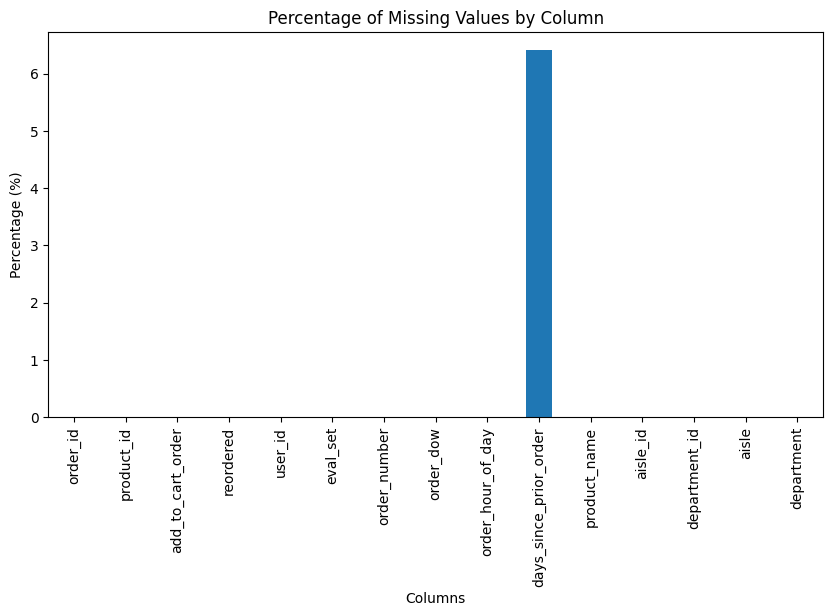

In [ ]:
##visulization of missing values:
import matplotlib.pyplot as plt
missing_pct = df.isna().mean() * 100
plt.figure(figsize=(10,5))
missing_pct.plot.bar()
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.show()



In [ ]:
## missing values handling:
missing_values=df.isnull().sum()
print("missing values in each column:\n",missing_values)
df["days_since_prior_order"]=df["days_since_prior_order"].fillna(-1).astype("int32")



missing values in each column:
 order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
dtype: int64


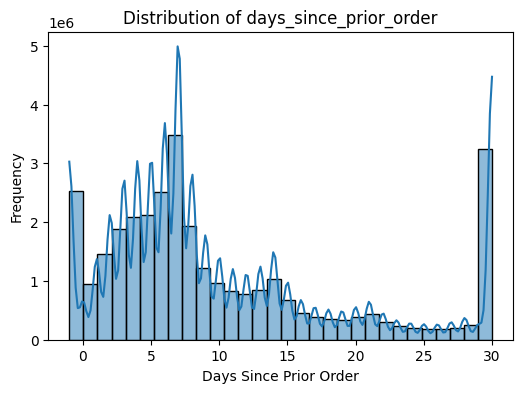

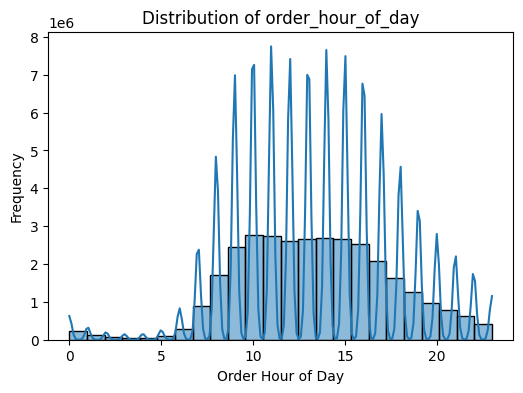

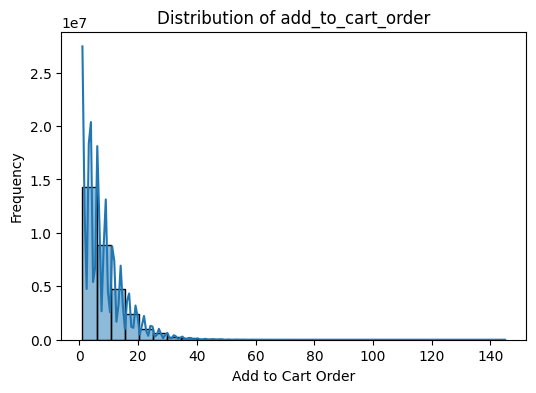

In [ ]:
##Distribution plots for numeric feature and targets (histogram ,dinsity plots): 
##days_since_prior_order distribution plot:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(df["days_since_prior_order"], kde=True, bins=30)
plt.title("Distribution of days_since_prior_order")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Frequency")
plt.show()
##order_hour_of_day distribution plot:
plt.figure(figsize=(6,4))
sns.histplot(df["order_hour_of_day"], kde=True, bins=24)
plt.title("Distribution of order_hour_of_day")
plt.xlabel("Order Hour of Day")
plt.ylabel("Frequency")
plt.show()
##add to cart order distribution plot:
plt.figure(figsize=(6,4))
sns.histplot(df["add_to_cart_order"], kde=True, bins=30)
plt.title("Distribution of add_to_cart_order")
plt.xlabel("Add to Cart Order")
plt.ylabel("Frequency")
plt.show()



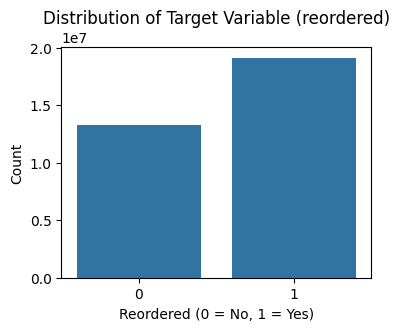

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,3))
sns.countplot(x="reordered", data=df)
plt.title("Distribution of Target Variable (reordered)")
plt.xlabel("Reordered (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [ ]:
##Categorical cardinality analysis (barplots / top-k frequencies
### top k products_names :
top_k_products = ( df["product_name"].value_counts().head(10))
top_k_products

product_name
Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: count, dtype: int64

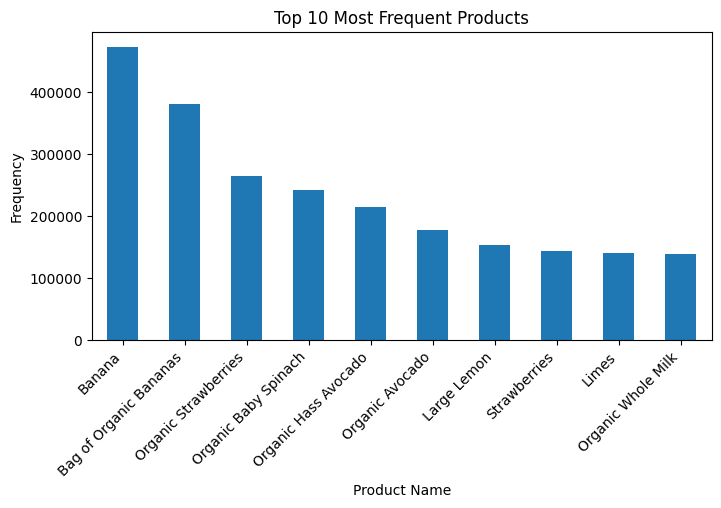

In [ ]:
##Categorical cardinality analysis (barplots / top-k frequencies)

top_k_products = df["product_name"].value_counts().head(10)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
top_k_products.plot(kind="bar")
plt.title("Top 10 Most Frequent Products")
plt.xlabel("Product Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
top_k_aisles = ( df["aisle"].value_counts().head(10))
top_k_aisles

aisle
fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
Name: count, dtype: int64

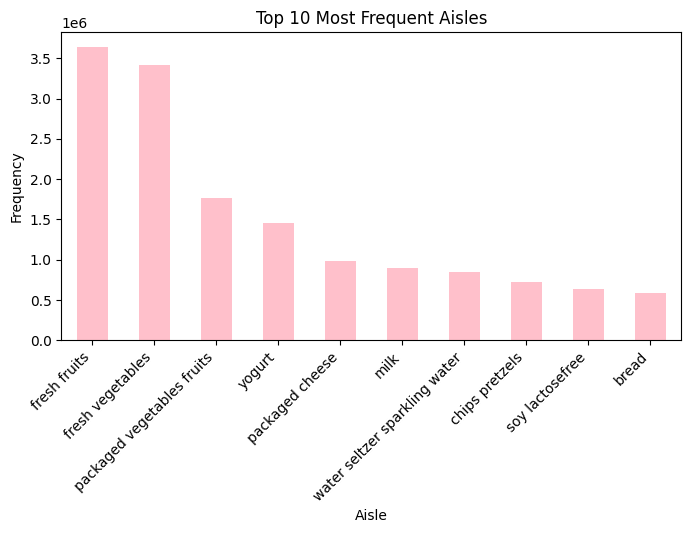

In [ ]:
## top k aisles :
plt.figure(figsize=(8,4))
top_k_aisles.plot(kind="bar", color="pink")
plt.title("Top 10 Most Frequent Aisles")
plt.xlabel("Aisle")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
df.columns

NameError: name 'df' is not defined

In [ ]:
##correlation analysis using for numeric variables:
numeric_cols = [
    'order_number',
    'order_hour_of_day',
    'days_since_prior_order',
    'add_to_cart_order',
    'reordered'
    
]
corr_matrix = df[numeric_cols].corr()
corr_matrix

,order_number,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
order_number,1.000000,-0.040049,-0.358422,-0.004228,0.306840
order_hour_of_day,-0.040049,1.000000,0.003878,-0.014805,-0.023300
days_since_prior_order,-0.358422,0.003878,1.000000,0.053951,-0.132814
add_to_cart_order,-0.004228,-0.014805,0.053951,1.000000,-0.133024
reordered,0.306840,-0.023300,-0.132814,-0.133024,1.000000


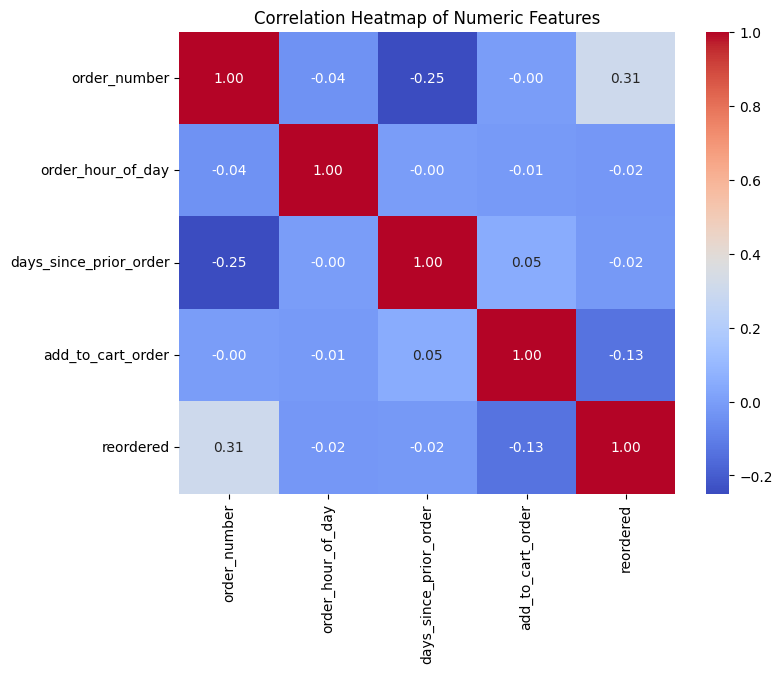

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

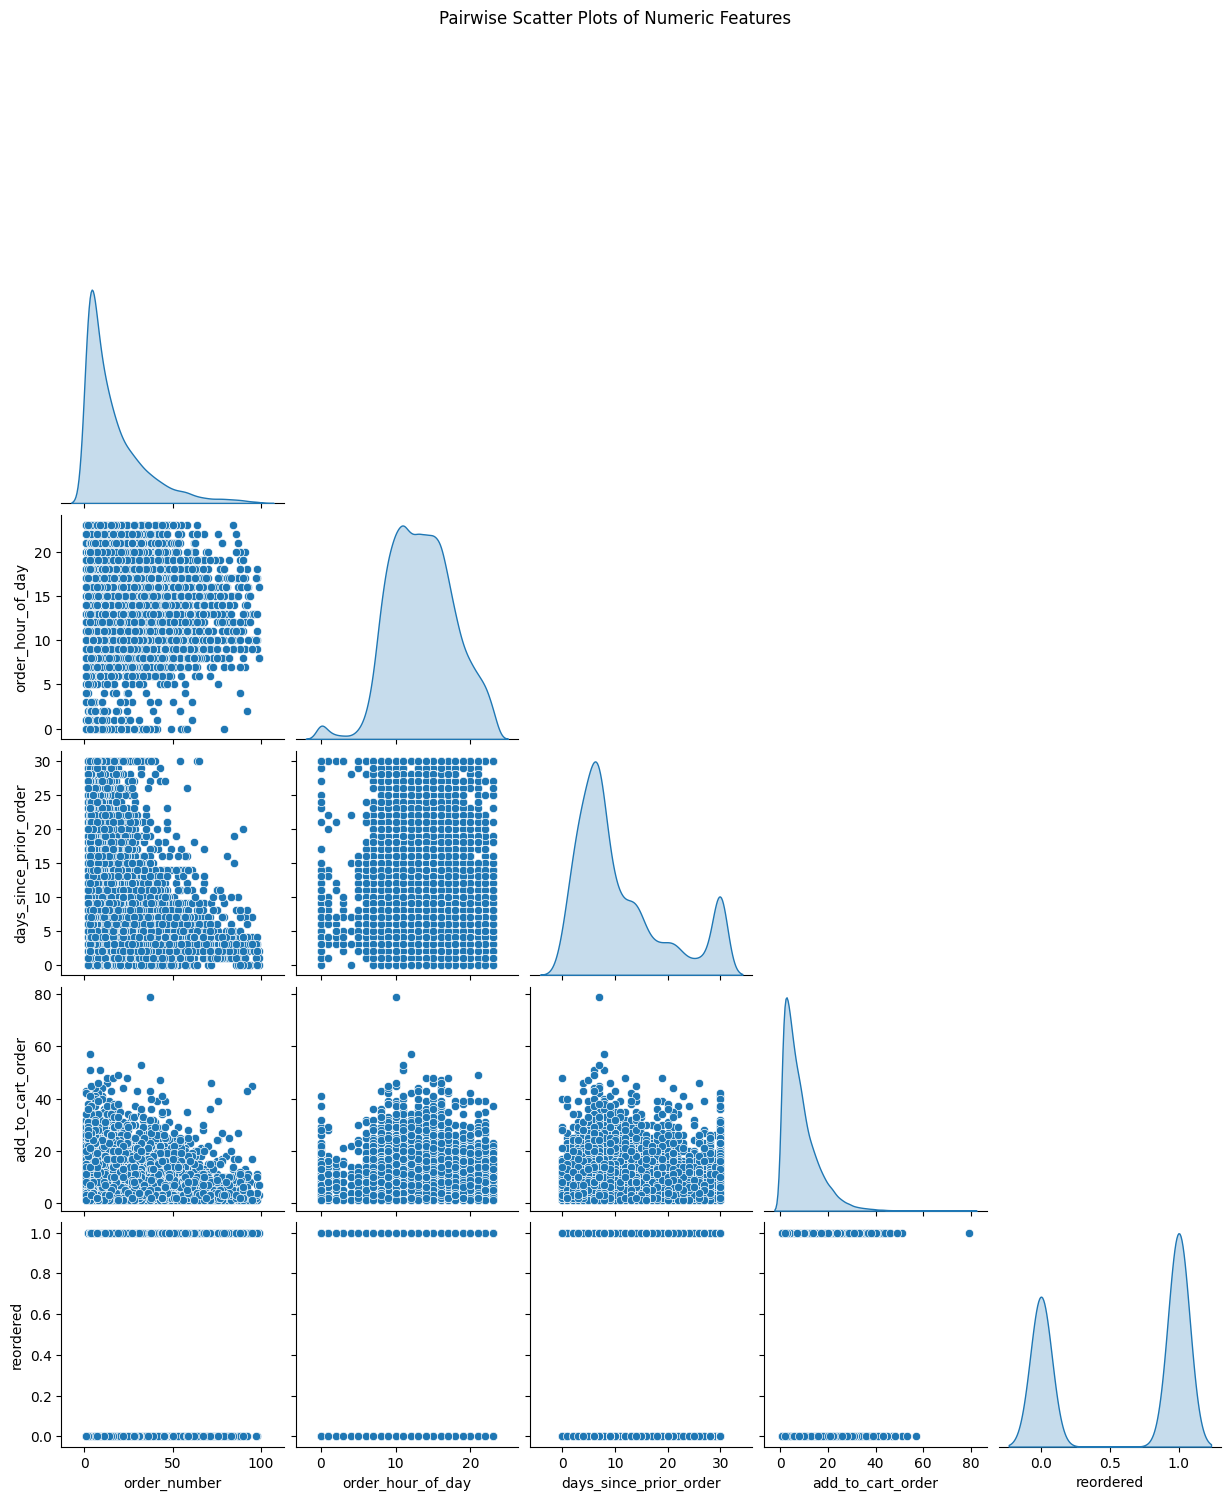

In [ ]:

##pairwise relationships:
sample_df = df[numeric_cols].sample(10000, random_state=42)

sns.pairplot(
    sample_df,
    diag_kind="kde",
    corner=True
)
plt.suptitle("Pairwise Scatter Plots of Numeric Features", y=1.2)
plt.show()

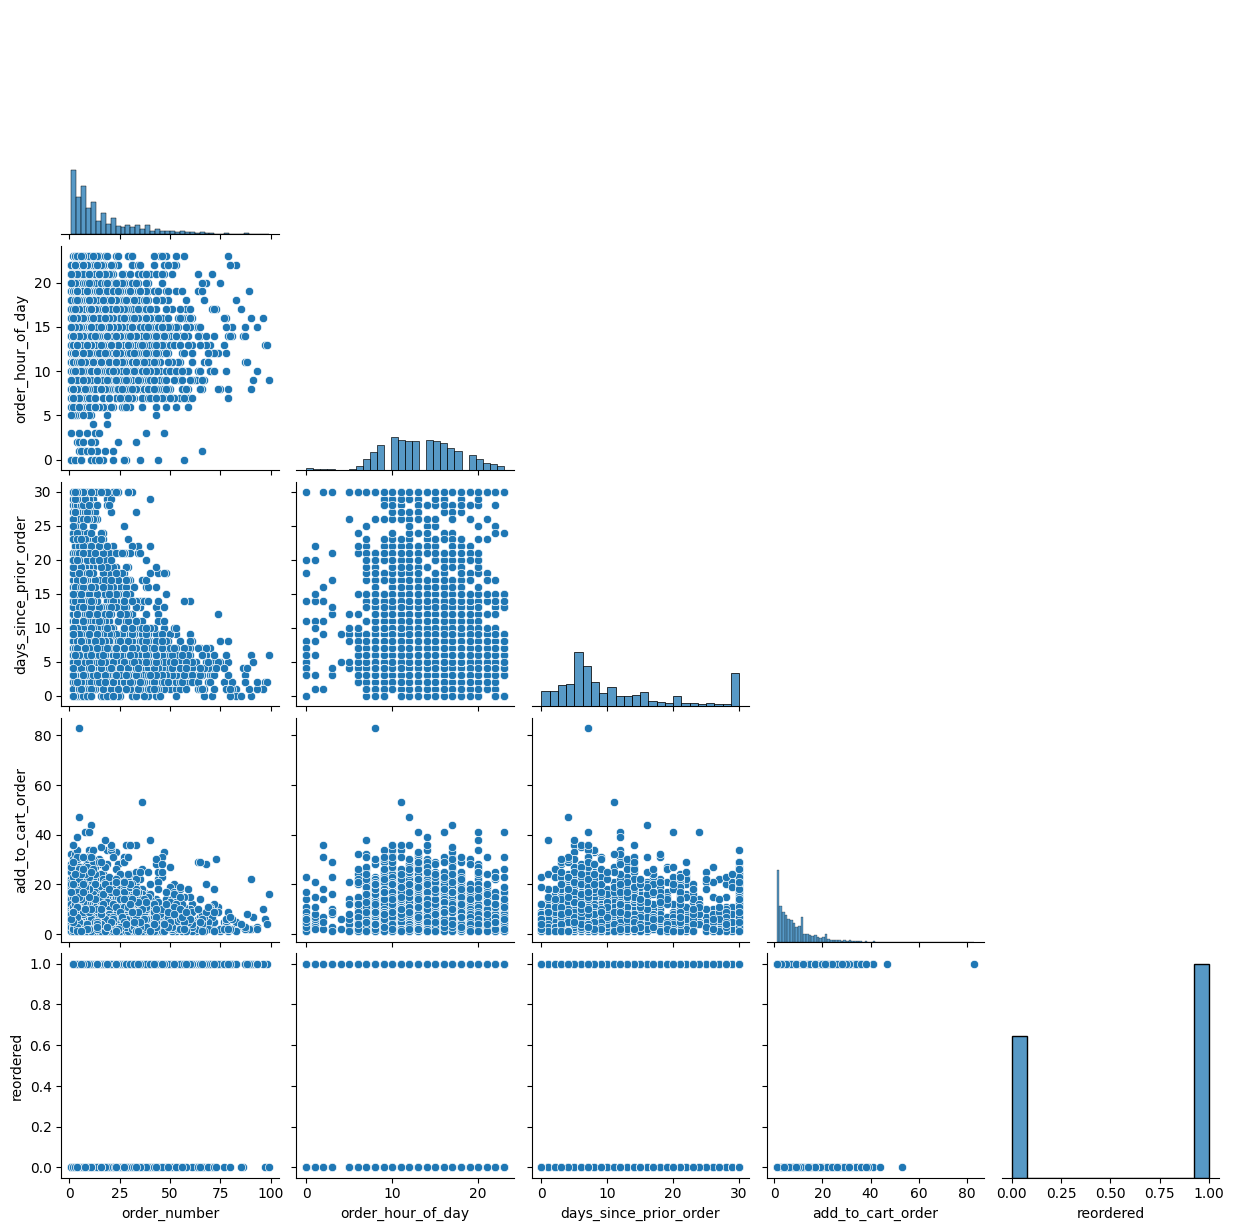

In [ ]:
##pairwise relationships:
sns.pairplot(df[numeric_cols].sample(3000), corner=True)
plt.show()

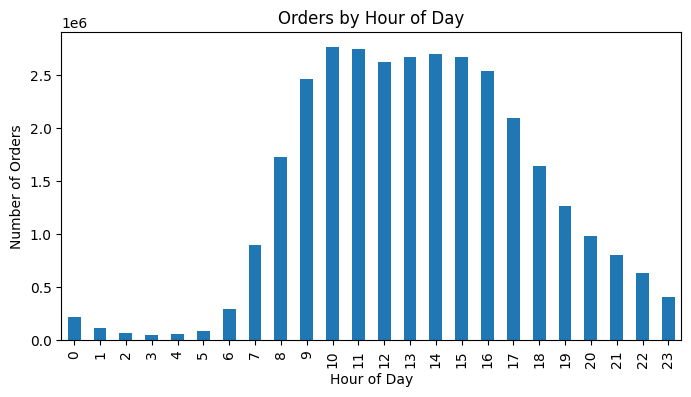

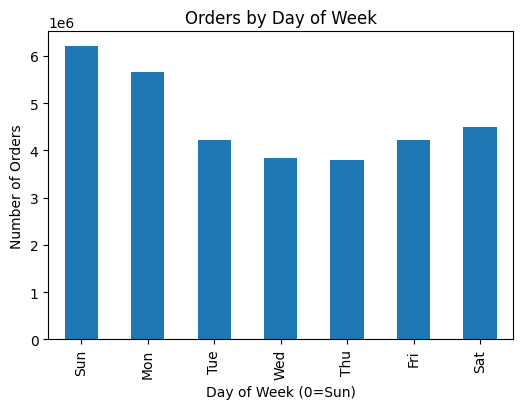

In [ ]:

##Time-of-day, day-of-week, and monthly seasonality plots.
orders_by_hour = df['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(8,4))
##orders by hours:
orders_by_hour.plot(kind='bar')
plt.title("Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()

## orders by day:
orders_by_day = df['order_dow'].value_counts().sort_index()
day_labels = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
orders_by_day.index = day_labels
plt.figure(figsize=(6,4))
orders_by_day.plot(kind='bar')
plt.title("Orders by Day of Week")
plt.xlabel("Day of Week (0=Sun)")
plt.ylabel("Number of Orders")
plt.show()


In [ ]:
##imputation techniques for missing:
df.isnull().sum()
median_value = df['days_since_prior_order'].median()
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(median_value)
mode_value = df['order_dow'].mode()[0]
df['order_dow'] = df['order_dow'].fillna(mode_value)
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)
df.isnull().sum()
## خطوة التحقق

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
dtype: int64

In [ ]:
## model_based:
from sklearn.impute import KNNImputer

imputer = KNNImputer(
    n_neighbors=5,
    weights="distance"
)

df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

ModuleNotFoundError: No module named 'sklearn'

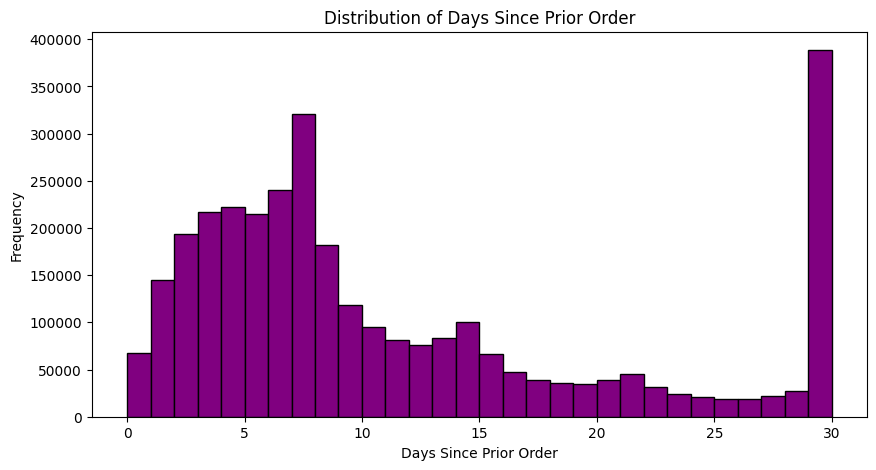

In [ ]:
##outlirer analysis for days_since_prior_order
import matplotlib.pyplot as plt 


orders['days_since_prior_order'].describe()
plt.figure(figsize=(10,5))
plt.hist(orders['days_since_prior_order'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days Since Prior Order') 
plt.ylabel('Frequency')
plt.show()

In [ ]:
#outliers treatment by Winsorization:
df['add_to_cart_order'] = df['add_to_cart_order'].clip(lower=lower_bound, upper=upper_bound)
df['add_to_cart_order'].describe()


count    3.243449e+07
mean     8.053282e+00
std      6.148754e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      2.300000e+01
Name: add_to_cart_order, dtype: float64

In [ ]:
#Encoding categorical variables:
##cat_col=df.select_dtypes(include=["object","category"]).columns
##print(cat_col)
##df_enc = pd.get_dummies(
  ##  df,columns=["eval_set", "aisle", "department"],
    ##drop_first=True


##df_enc.shape()
#لو كملت get dummies رح يعمل memory error لانه : 32 صف وال one_Hot fdulg بيعمل نسخ ضخمة بالذاكرة 


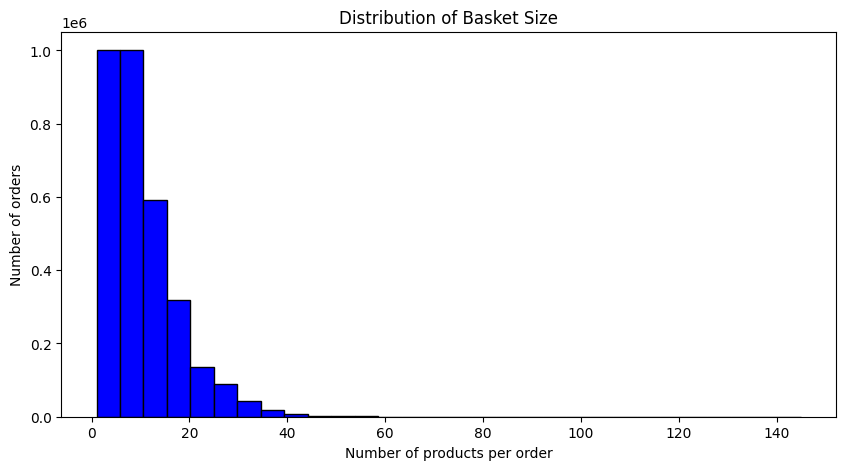

In [ ]:
## Behavioral EDA :
basket_size=df.groupby("order_id")["product_id"].count()
basket_size.describe()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(basket_size,bins=30,color='blue',edgecolor='black')
plt.xlabel("Number of products per order")
plt.ylabel("Number of orders")
plt.title("Distribution of Basket Size")
plt.show()

In [ ]:
orders['days_since_prior_order'].describe()

count    3.214874e+06
mean     1.111484e+01
std      9.206737e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

In [ ]:
df.memory_usage(deep=True).sum() / 1024**2
categorical_cols = [
    'order_dow',
    'order_hour_of_day',
    'department',
    'aisle',
    'product_name'
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
df['reordered'] = df['reordered'].astype('int8')
df['add_to_cart_order'] = df['add_to_cart_order'].astype('int16')
df['order_number'] = df['order_number'].astype('int16')
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0).astype('int16')
df.memory_usage(deep=True).sum() / 1024**2

KeyboardInterrupt: 

In [ ]:
# Feature engineering:
#1️⃣1️User-level Features:
#(1) total #orders:
user_total_orders = orders.groupby('user_id')['order_id'].nunique().reset_index()
user_total_orders.rename(columns={'order_id': 'total_orders'}, inplace=True)
#(2) average basket size:
basket_size = df.groupby('order_id')['product_id'].count().reset_index()
basket_size.rename(columns={'product_id':'basket_size'}, inplace=True)

basket_size = basket_size.merge(
    orders[['order_id','user_id']],
    on='order_id'
)

avg_basket = basket_size.groupby('user_id')['basket_size'].mean().reset_index()
#(3) reorder ratio:
reorder_ratio = df.groupby('user_id')['reordered'].mean().reset_index()
#(4) mean days between orders:
mean_days_between_orders = orders.groupby('user_id')['days_since_prior_order'].mean().reset_index()
#(5) last order recency:
last_order_recency = orders.groupby('user_id')['days_since_prior_order'].last().reset_index()
#2️⃣ Product-level Features:
product_reorder = df.groupby('product_id')['reordered'].mean().reset_index()
#(2) average position in cart:
avg_cart_pos = df.groupby('product_id')['add_to_cart_order'].mean().reset_index()
#3️⃣ User × Product Interaction Features:
#(1) prior purchase count:
prior_count = df.groupby(
    ['user_id','product_id']
).size().reset_index(name='prior_count')
#2️⃣ days since last purchase by that user:
df_sorted = df.sort_values(['user_id','product_id','order_number'])
last_purchase = df_sorted.groupby(['user_id','product_id'])['order_number'].diff()
#4️⃣ Temporal Features:
df['order_hour'] = df['order_hour_of_day']
df['order_day'] = df['order_dow']
df['season'] = df['order_month'].map({
    12:'Winter',1:'Winter',2:'Winter',
    3:'Spring',4:'Spring',5:'Spring',
    6:'Summer',7:'Summer',8:'Summer',
    9:'Fall',10:'Fall',11:'Fall'
})
#5️⃣ Aggregations over windows:

recent_orders = orders[
    orders['order_number'] >= orders.groupby('user_id')['order_number'].transform('max') - 3
]

#6️⃣ Non-linear Feature:
import numpy as np
df['log_num_products'] = np.log1p(df['num_products'])







NameError: name 'df' is not defined

In [ ]:
df.numeric_columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# نفترض X_scaled هي الـ features بعد Scaling
X_vif = pd.DataFrame()
X_vif['feature'] = numeric_cols  # الأعمدة اللي نريد نفحصها
X_vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]


NameError: name 'numeric_cols' is not defined

In [ ]:
#تسممية df_modele البيانات النهائية بعد معالجنها
feature_cols = [
    'order_number',
    'order_dow',
    'order_hour_of_day',
    'days_since_prior_order',

    'total_orders',
    'avg_basket_size',
    'reorder_ratio',
    'mean_days_between_orders',
    'last_order_recency',

    'product_reorder_rate',
    'avg_add_to_cart_order',
    'prior_count',

    'log_total_orders'
]
df_model = df[feature_cols + ['reordered']].copy()
df_model.info()

# تبدأ خطوة الclassification modeling:
from sklearn.model_selection import train_test_split

X = df_model.drop(columns=['reordered'])
y = df_model['reordered']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
# هذه الخطوة تستخدم معى فقط logical regression, KNN, SVM:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
#**************************************************************************
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)

log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:,1]
#**************************************************************************
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5,
    metric='euclidean'
)

knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:,1]
#**************************************************************************

from sklearn.svm import SVC

svm = SVC(
    kernel='linear',
    probability=True,
    class_weight='balanced'
)

svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:,1]

#**************************************************************************


from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

#**************************************************************************

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

#**************************************************************************

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    confusion_matrix
)

def evaluate_model(y_true, y_pred, y_prob):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'ROC_AUC': roc_auc_score(y_true, y_prob),
        'PR_AUC': average_precision_score(y_true, y_prob)
    }

results = {
    'Logistic': evaluate_model(y_test, y_pred, y_prob),
    'KNN': evaluate_model(y_test, y_pred_knn, y_prob_knn),
    'SVM': evaluate_model(y_test, y_pred_svm, y_prob_svm),
    'DecisionTree': evaluate_model(y_test, y_pred_dt, y_prob_dt),
    'RandomForest': evaluate_model(y_test, y_pred_rf, y_prob_rf),
    'XGBoost': evaluate_model(y_test, y_pred_xgb, y_prob_xgb)
}

# رسم للمقارنة:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'AP = {ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Raw confusion matrix:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Raw)')
plt.show()

#Normalized confusion matrix
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(4,3))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Normalized)')
plt.show()

#ROC Curve + AUC (تأكيد نهائي)

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Model Comparison:
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['Logistic'],
    'AUC': [auc],
    'AP': [ap]
})

results_df
results_df.set_index('Model')[['AUC','AP']].plot(kind='bar', figsize=(6,4))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show()




In [ ]:
#REGRESSION MODELING: numrical
y = df_model['days_since_prior_order']  # target رقمي
X = df_model[['order_number', 'order_dow', 'order_hour_of_day',
              'total_orders', 'avg_basket_size', 'reorder_ratio',
              'mean_days_between_orders', 'last_order_recency']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.3f}")
#********************************************************************************************************************

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
#***********************************************************************************************************************
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
#***********************************************************************************************************************
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en.fit(X_train_scaled, y_train)
y_pred_en = en.predict(X_test_scaled)
#***********************************************************************************************************************
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
#***********************************************************************************************************************
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
#***********************************************************************************************************************
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
#***********************************************************************************************************************
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='rmse',
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# مثال: Linear Regression
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


residuals = y_test - y_pred_lr

# Histogram
plt.hist(residuals, bins=30)
plt.title('Residuals Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Predicted vs Residuals
plt.scatter(y_pred_lr, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


n = X_test.shape[0]  # عدد العينات
p = X_test.shape[1]  # عدد الميزات
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print(f"Adjusted R²: {adj_r2:.3f}")


from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    lr, X_train_scaled, y_train, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 5)
)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train R²')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation R²')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


results = {
    "Linear": mean_squared_error(y_test, y_pred_lr),
    "Ridge": mean_squared_error(y_test, y_pred_ridge),
    "Lasso": mean_squared_error(y_test, y_pred_lasso),
    "ElasticNet": mean_squared_error(y_test, y_pred_en),
    "KNN": mean_squared_error(y_test, y_pred_knn),
    "DT": mean_squared_error(y_test, y_pred_dt),
    "RF": mean_squared_error(y_test, y_pred_rf),
    "XGB": mean_squared_error(y_test, y_pred_xgb)
}

pd.DataFrame.from_dict(results, orient='index', columns=['MSE'])






